SK-Learn (w, b) =  [-4.54449866] 5.17550358024579
SGD (w, b) =  0.2473751718343489 3.9347166742101134
MSE: (SK, SGD =  1.1037771847568691 0.7084340047575485
R2 Score =  0.5617634020619927


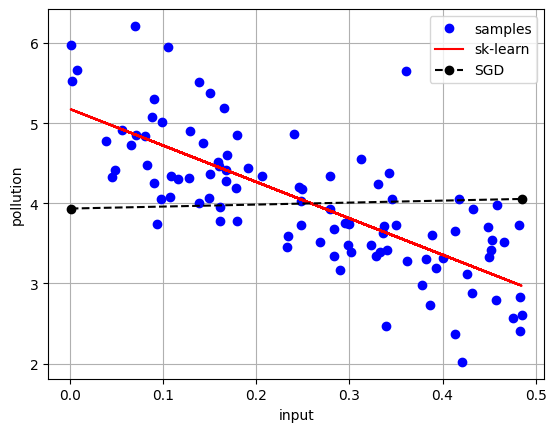

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

def h(x, w, b):
  return w * x + b

data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home + 'pollution.csv')

x = lin_data['input'].to_numpy() #feature
y = lin_data['pollution'].to_numpy() #label
x = x[:, np.newaxis]
lin_reg = linear_model.LinearRegression()
lin_reg.fit(x, y)

#----
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_reg.fit(x, y)
w_sgd_f = sgd_reg.coef_[0]
b_sgd_f = sgd_reg.intercept_[0]

#----
w_sk = lin_reg.coef_
b_sk = lin_reg.intercept_
print("SK-Learn (w, b) = ",w_sk, b_sk)
print("SGD (w, b) = ", w_sgd_f, b_sgd_f)

o = h(x, w_sk, b_sk)
mse_sk = np.average(np.square(y - o))
o = h(x, w_sgd_f, b_sgd_f)
mse_sgd = np.average(np.square(y - o))
print("MSE: (SK, SGD = ", mse_sk, mse_sgd)
print("R2 Score = ", lin_reg.score(x, y))

x0 = lin_data['input'].min()
x1 = lin_data['input'].max()
y_pred = lin_reg.predict(x)

plt.plot(x, y, 'bo', label = 'samples')
plt.plot(x, y_pred, 'r-', label = 'sk-learn')
plt.plot([x0, x1], [h(x0, w_sgd_f, b_sgd_f), h(x1, w_sgd_f, b_sgd_f)], 'ko--', label = 'SGD')

plt.xlabel('input')
plt.ylabel('pollution')
plt.legend()
plt.grid()
plt.show()

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split

data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home + 'pollution.csv')

x = lin_data['input'].to_numpy() #feature
y = lin_data['pollution'].to_numpy() #label
x = x[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42, train_size = 0.7)

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

w_sk = lin_reg.coef_
b_sk = lin_reg.intercept_
print("SK-Learn (w, b) = ", w_sk, b_sk)
print("R2 score for test dataset = ", lin_reg.score(X_test, y_test))

SK-Learn (w, b) =  [-4.57330432] 5.13192266935957
R2 score for test dataset =  0.6069818162703671
